#Unsupervised preprocessing and visualization

Import CSV Daten

In [7]:
import pandas as pd
df = pd.read_csv("data/food.csv")
print(df.head()) 

       Unnamed: 0  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0         Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1         Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2         Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3        Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4  Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   

   Nuts  Fr.Veg  
0   5.5     1.7  
1   1.3     4.3  
2   2.1     4.0  
3   3.7     4.2  
4   1.1     4.0  


In [8]:
from sklearn.preprocessing import StandardScaler

# Get the dimensions of the dataframe
print("Dimensions of the dataframe:", df.shape)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 1:])  # Exclude the first column (country names)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[1:])
print("Scaled features:\n", scaled_df.head())


Dimensions of the dataframe: (25, 10)
Missing values in each column:
 Unnamed: 0    0
RedMeat       0
WhiteMeat     0
Eggs          0
Milk          0
Fish          0
Cereals       0
Starch        0
Nuts          0
Fr.Veg        0
dtype: int64
Scaled features:
     RedMeat  WhiteMeat      Eggs      Milk      Fish   Cereals    Starch  \
0  0.082941  -1.794750 -2.224584 -1.179570 -1.225033  0.934804 -2.295965   
1 -0.282974   1.686446  1.245621  0.400468 -0.655111 -0.395051 -0.422218   
2  1.119699   0.387905  1.062979  0.055732  0.064791 -0.525246  0.889405   
3 -0.618396  -0.523837 -1.220051 -1.265754 -0.925074  2.273959 -1.983674   
4 -0.039031   0.968104 -0.124197 -0.662467 -0.685107  0.190830  0.452198   

       Nuts    Fr.Veg  
0  1.247968 -1.378251  
1 -0.910790  0.092789  
2 -0.499598 -0.076947  
3  0.322786  0.036210  
4 -1.013588 -0.076947  


In [9]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
print(pca_df.head())

   Principal Component 1  Principal Component 2
0               3.557238              -1.664102
1              -1.452006              -1.062702
2              -1.655480               0.162784
3               3.198708              -1.327895
4              -0.378104              -0.615096


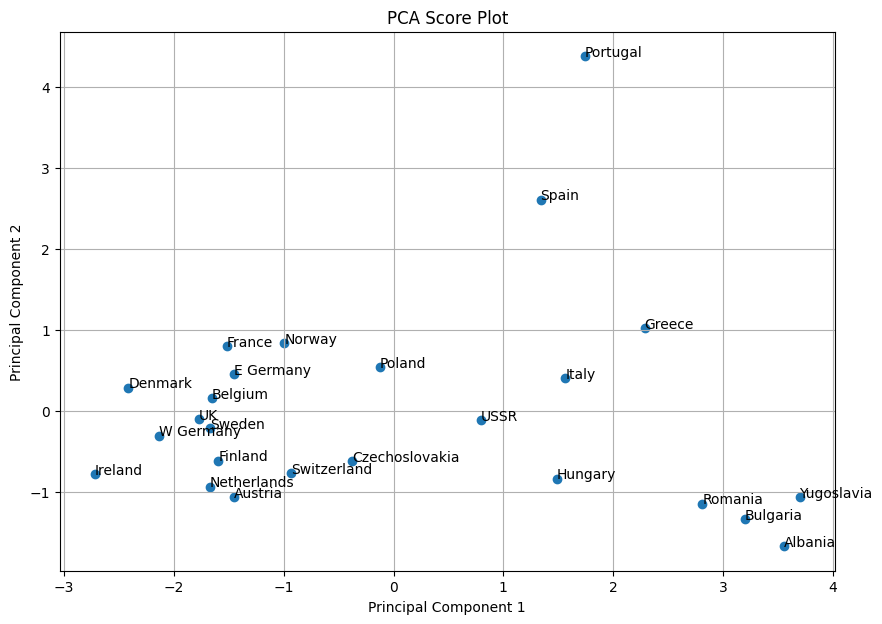

In [10]:
import matplotlib.pyplot as plt

# Create a scatter plot of the principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])

# Add labels to the plot
plt.title('PCA Score Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotate each point with the corresponding country name
for i, country in enumerate(df['Unnamed: 0']):
    plt.annotate(country, (pca_df['Principal Component 1'][i], pca_df['Principal Component 2'][i]))

plt.grid()
plt.show()